In [1]:
import sys
print(sys.executable)
print(sys.path)
# setting up the interpreter

C:\Code\ISHenv\Scripts\python.exe
['C:\\Users\\Ishmeet\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\Ishmeet\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\Ishmeet\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\Ishmeet\\AppData\\Local\\Programs\\Python\\Python310', 'C:\\Code\\ISHenv', '', 'C:\\Code\\ISHenv\\lib\\site-packages', 'C:\\Code\\ISHenv\\lib\\site-packages\\win32', 'C:\\Code\\ISHenv\\lib\\site-packages\\win32\\lib', 'C:\\Code\\ISHenv\\lib\\site-packages\\Pythonwin']


In [2]:
!pip install seaborn
!pip install neattext scikit-learn

#installing the requried libraries


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

# data loading and cleanup
import pandas as pd
import numpy as np

# plotting
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# Load Dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")

In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

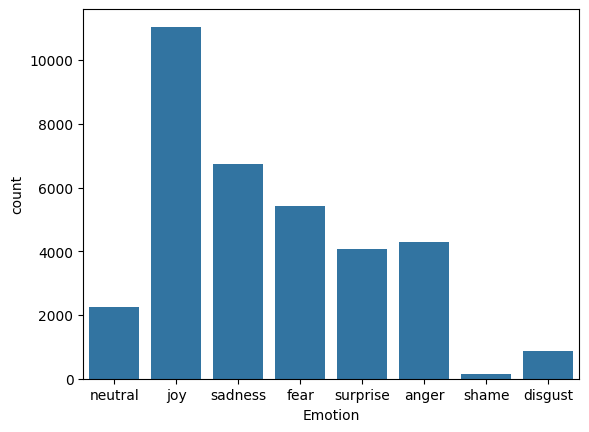

In [7]:
# Plot
sns.countplot(x='Emotion',data=df)

In [8]:
# Data Cleaning
dir(nfx) # for removing stuff like special characters, stopwords, usernames, urls 

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
# Usernames
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [10]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [11]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [12]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [13]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [14]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

pipe_mlp = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300))
])
pipe_mlp.fit(x_train, y_train)
print(pipe_mlp.score(x_test, y_test))


0.6316344127227438


In [16]:
pipe_mlp

,steps,"[('tfidf', ...), ('mlp', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [17]:
# Check Accuracy
pipe_mlp.score(x_test,y_test)

0.6316344127227438

In [18]:
# Make A Prediction
ex1 = "I think therefore I am"

In [19]:
pipe_mlp.predict([ex1])

array(['joy'], dtype='<U8')

In [20]:
# Prediction Prob
pipe_mlp.predict_proba([ex1])

array([[1.28619078e-01, 3.25616088e-03, 3.87369372e-03, 5.71874158e-01,
        2.84698425e-01, 6.52026098e-03, 2.38819847e-04, 9.19403343e-04]])

In [21]:
# To Know the classes
pipe_mlp.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [22]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/emotion_classifier_pipe_mlp.pkl","wb")
joblib.dump(pipe_mlp,pipeline_file)
pipeline_file.close()

In [2]:
import joblib
pipe_mlp = joblib.load("../models/emotion_classifier_pipe_mlp.pkl")
ex2 = "I am going to die"
pipe_mlp.predict([ex2])

array(['sadness'], dtype='<U8')